In [1]:
#A_ch02_103_Logistic.ipynb
#邏輯斯回歸分類(logistic regression classifier)
#linear support vector machines, linearSVMs(線性支援向量機)

In [2]:
from sklearn.linear_model import LogisticRegression #import LogisticRegression

In [3]:
from sklearn.svm import LinearSVC #import LinearSVC

In [4]:
#以mglearn make_forge() 虛擬資料集做說明
import mglearn

In [5]:
X,y=mglearn.datasets.make_forge() #make_forge()

In [6]:
#檢視 make_forge() 產生的合成資料
print('X.shape-->',X.shape,' y.shapr-->',y.shape,' X[0]-->',X[0],' y[0]-->',y[0])

X.shape--> (26, 2)  y.shapr--> (26,)  X[0]--> [ 9.96346605  4.59676542]  y[0]--> 1


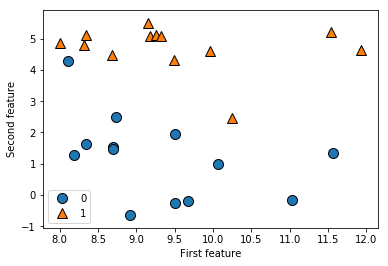

In [7]:
#繪製 make_forge() 產生的合成資料資料集
import matplotlib.pyplot as plt
%matplotlib inline
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0","Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.legend()

In [8]:
#====================================================
#LogisticRegression 與 LinearSVC 比較

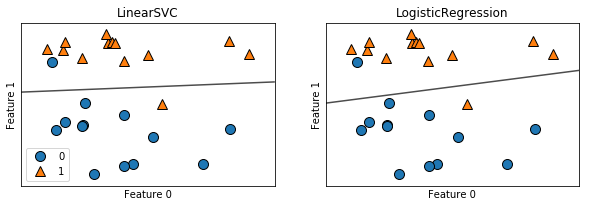

In [9]:
#繪製 subplots (1,2)
fig,axes=plt.subplots(1,2,figsize=(10,3))
#以zip同時迭代 list,axes; 同時建立 LinearSVC與LogisticRession 物件
for model,ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf=model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=0.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In [10]:
#====================================================
#LogisticRegression 與 LinearSVC 參數 'C' 調整

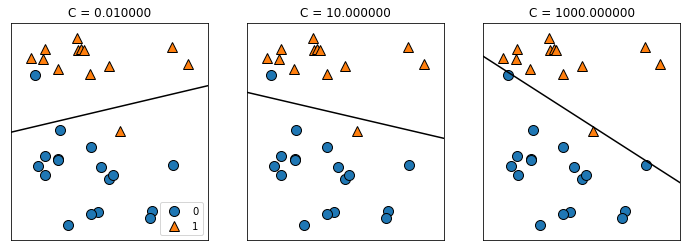

In [11]:
mglearn.plots.plot_linear_svc_regularization()

In [12]:
#LogsiticRegresssion 實作範例
#在癌症資料集上以 LogsiticRegression 實作並分析

In [13]:
#import and load cancer datasets
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [14]:
#import train_test_split, 並將資料split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,
                                              stratify=cancer.target,random_state=42)

In [15]:
#建立 LogisticRession Model 'logreg', 並以 train datasets 訓練
logreg=LogisticRegression().fit(X_train,y_train)

In [19]:
#分別以 train 及 test datasets 評分
print('Training set score: ',logreg.score(X_train,y_train))

Training set score:  0.955399061033


In [21]:
print('Test set score: ',logreg.score(X_test,y_test))

Test set score:  0.958041958042


In [22]:
#以 model.get_params() 檢視預設參數
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [23]:
#上面程式 C=1.0 (預設值),train/test score 幾乎一樣，
#直覺上，我們認為 under fitting
#我們用一個較大的 C 值(C=100) 及 較低的 C 值(C=0.01) 試試看

In [25]:
logreg100=LogisticRegression(C=100).fit(X_train,y_train)
print('C=100 \n')
print('Training set score: ',logreg100.score(X_train,y_train))
print('Test set score: ',logreg100.score(X_test,y_test))

C=100 

Training set score:  0.971830985915
Test set score:  0.965034965035


In [26]:
logreg001=LogisticRegression(C=0.01).fit(X_train,y_train)
print('C=0.01 \n')
print('Training set score: ',logreg001.score(X_train,y_train))
print('Test set score: ',logreg001.score(X_test,y_test))

C=0.01 

Training set score:  0.934272300469
Test set score:  0.93006993007


In [37]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

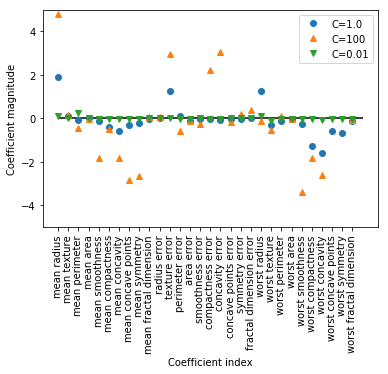

In [38]:
#將上述三個不同 C 值 (C=1.0, C=100, C=0.01)
#所學習到的係數 (model.coef_), 畫圖分析比較
plt.plot(logreg.coef_.T,'o',label='C=1.0')
plt.plot(logreg100.coef_.T,'^',label='C=100')
plt.plot(logreg001.coef_.T,'v',label='C=0.01')
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.legend()

30